In [1]:
#Set-up
#Dependencies
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

#File path to csv and displaying it
Daily_Mask = "Resources/Daily_Mask_State.csv"
Daily_Mask_df = pd.read_csv(Daily_Mask)
Daily_Mask_df.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [2]:
#Seeing all the unique states in the dataframe
print(Daily_Mask_df["State_Tribe_Territory"].unique())

['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'DE' 'CT' 'FL' 'DC' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MA' 'MD' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'AS' 'GU' 'MP' 'PR' 'VI']


In [3]:
#Deleting all territories and DC in dataset since we want only states
Daily_Mask_df.drop(Daily_Mask_df.index[(Daily_Mask_df["State_Tribe_Territory"] == "AS")],axis=0,inplace=True)
Daily_Mask_df.drop(Daily_Mask_df.index[(Daily_Mask_df["State_Tribe_Territory"] == "GU")],axis=0,inplace=True)
Daily_Mask_df.drop(Daily_Mask_df.index[(Daily_Mask_df["State_Tribe_Territory"] == "MH")],axis=0,inplace=True)
Daily_Mask_df.drop(Daily_Mask_df.index[(Daily_Mask_df["State_Tribe_Territory"] == "MP")],axis=0,inplace=True)
Daily_Mask_df.drop(Daily_Mask_df.index[(Daily_Mask_df["State_Tribe_Territory"] == "PR")],axis=0,inplace=True)
Daily_Mask_df.drop(Daily_Mask_df.index[(Daily_Mask_df["State_Tribe_Territory"] == "PW")],axis=0,inplace=True)
Daily_Mask_df.drop(Daily_Mask_df.index[(Daily_Mask_df["State_Tribe_Territory"] == "VI")],axis=0,inplace=True)
Daily_Mask_df.drop(Daily_Mask_df.index[(Daily_Mask_df["State_Tribe_Territory"] == "UM")],axis=0,inplace=True)
Daily_Mask_df.drop(Daily_Mask_df.index[(Daily_Mask_df["State_Tribe_Territory"] == "DC")],axis=0,inplace=True)
Daily_Mask_df.count()

State_Tribe_Territory            1548513
County_Name                      1548513
FIPS_State                       1548513
FIPS_County                      1548513
date                             1548513
order_code                       1548513
Face_Masks_Required_in_Public     946475
Source_of_Action                  946475
URL                               901788
Citation                          936193
dtype: int64

In [4]:
#Keeping the necessary columns
Mask_df = Daily_Mask_df[["State_Tribe_Territory","County_Name","date","Face_Masks_Required_in_Public"]]
Mask_df.head()

,State_Tribe_Territory,County_Name,date,Face_Masks_Required_in_Public
0,AL,Autauga County,4/10/2020,NaN
1,AL,Autauga County,4/11/2020,NaN
2,AL,Autauga County,4/12/2020,NaN
3,AL,Autauga County,4/13/2020,NaN
4,AL,Autauga County,4/14/2020,NaN


In [5]:
#Shows how many days there are in the date column (493 days for each county)
#This will be important later on.
Mask_Groupby = Mask_df.groupby(["State_Tribe_Territory","County_Name"]).count()
print(Mask_Groupby)

                                                  date  \
State_Tribe_Territory County_Name                        
AK                    Aleutians East Borough       493   
                      Aleutians West Census Area   493   
                      Anchorage Municipality       493   
                      Bethel Census Area           493   
                      Bristol Bay Borough          493   
...                                                ...   
WY                    Sweetwater County            493   
                      Teton County                 493   
                      Uinta County                 493   
                      Washakie County              493   
                      Weston County                493   

                                                  Face_Masks_Required_in_Public  
State_Tribe_Territory County_Name                                                
AK                    Aleutians East Borough                                  0  

In [6]:
#replacing the results in the Face_Masks column to be integers for summation (no is 0, yes is 1)
Mask_df["Face_Masks_Required_in_Public"] = Mask_df["Face_Masks_Required_in_Public"].str.replace("Yes","1")
Mask_df["Face_Masks_Required_in_Public"] = Mask_df["Face_Masks_Required_in_Public"].str.replace("No","0")
Mask_df["Face_Masks_Required_in_Public"] = Mask_df["Face_Masks_Required_in_Public"].fillna(0)
Mask_df["Face_Masks_Required_in_Public"] = Mask_df["Face_Masks_Required_in_Public"].astype(int)
print(Mask_df)


        State_Tribe_Territory     County_Name       date  \
0                          AL  Autauga County  4/10/2020   
1                          AL  Autauga County  4/11/2020   
2                          AL  Autauga County  4/12/2020   
3                          AL  Autauga County  4/13/2020   
4                          AL  Autauga County  4/14/2020   
...                       ...             ...        ...   
1573408                    WY   Weston County  8/11/2021   
1573409                    WY   Weston County  8/12/2021   
1573410                    WY   Weston County  8/13/2021   
1573411                    WY   Weston County  8/14/2021   
1573412                    WY   Weston County  8/15/2021   

         Face_Masks_Required_in_Public  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  
...                              

In [7]:
#Summation of required mask mandate in all counties in all states
Mask_Sum_State = Mask_df.groupby(["State_Tribe_Territory"]).agg({"Face_Masks_Required_in_Public":["sum"]})
Mask_Sum_State.columns = ["State"]
print(Mask_Sum_State)
#Each state has different number of counties so need to divide the state by county to get the average Mask Mandate duration

                       State
State_Tribe_Territory       
AK                         0
AL                     17889
AR                     19050
AZ                         0
CA                     24592
CO                     16704
CT                      3864
DE                      1233
FL                         0
GA                         0
HI                      2430
IA                      8118
ID                         0
IL                     41412
IN                     23276
KS                     28455
KY                     40320
LA                     19264
MA                      5432
MD                      9408
ME                      6208
MI                     34777
MN                     25578
MO                         0
MS                     12428
MT                     11872
NC                     32200
ND                      3498
NE                         0
NH                      1480
NJ                      8673
NM                     15063
NV            

In [8]:
#Summation of all counties by state
Mask_County = Mask_df.groupby(["State_Tribe_Territory"]).agg({"County_Name":["count"]})
Mask_County.columns = ["Total_County"]

#Divde by 493 from the number of rows that we found before
Mask_County["Number_of_Counties"] = Mask_County["Total_County"]/493
print(Mask_County)

                       Total_County  Number_of_Counties
State_Tribe_Territory                                  
AK                            14297                29.0
AL                            33031                67.0
AR                            36975                75.0
AZ                             7395                15.0
CA                            28594                58.0
CO                            31552                64.0
CT                             3944                 8.0
DE                             1479                 3.0
FL                            33031                67.0
GA                            78387               159.0
HI                             2465                 5.0
IA                            48807                99.0
ID                            21692                44.0
IL                            50286               102.0
IN                            45356                92.0
KS                            51765             

In [9]:
#Now we do the division to get the average Mask Mandate duration for each state
Mask_Sum_State["Total_Days"] = Mask_Sum_State["State"]/Mask_County["Number_of_Counties"]
print(Mask_Sum_State)

                       State  Total_Days
State_Tribe_Territory                   
AK                         0    0.000000
AL                     17889  267.000000
AR                     19050  254.000000
AZ                         0    0.000000
CA                     24592  424.000000
CO                     16704  261.000000
CT                      3864  483.000000
DE                      1233  411.000000
FL                         0    0.000000
GA                         0    0.000000
HI                      2430  486.000000
IA                      8118   82.000000
ID                         0    0.000000
IL                     41412  406.000000
IN                     23276  253.000000
KS                     28455  271.000000
KY                     40320  336.000000
LA                     19264  301.000000
MA                      5432  388.000000
MD                      9408  392.000000
ME                      6208  388.000000
MI                     34777  419.000000
MN              

In [10]:
Longest_Mask_States = Mask_Sum_State.nlargest(n=10,columns=["Total_Days"])
print(Longest_Mask_States)

                       State  Total_Days
State_Tribe_Territory                   
HI                      2430  486.000000
CT                      3864  483.000000
NM                     15063  456.454545
PA                     29145  435.000000
NY                     26908  434.000000
CA                     24592  424.000000
RI                      2120  424.000000
MI                     34777  419.000000
NV                      7106  418.000000
WA                     16224  416.000000


In [11]:
Shortest_Mask_States = Mask_Sum_State.nsmallest(n=11,columns=["Total_Days"])
print(Shortest_Mask_States)

                       State  Total_Days
State_Tribe_Territory                   
AK                         0         0.0
AZ                         0         0.0
FL                         0         0.0
GA                         0         0.0
ID                         0         0.0
MO                         0         0.0
NE                         0         0.0
OK                         0         0.0
SC                         0         0.0
SD                         0         0.0
TN                         0         0.0


In [12]:
#Making a bar chart with the results
#Making the y-axis of bar chart
Mask_Mandate_Duration = [] 
Mask_Mandate_Duration_a = Longest_Mask_States["Total_Days"].tolist()
Mask_Mandate_Duration_b = Shortest_Mask_States["Total_Days"].tolist()
Mask_Mandate_Duration = Mask_Mandate_Duration_a + Mask_Mandate_Duration_b
print(Mask_Mandate_Duration)

[486.0, 483.0, 456.45454545454544, 435.0, 434.0, 424.0, 424.0, 419.0, 418.0, 416.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [13]:
#Making the x-axis of bar chart
Mask_Mandate_State = [] 
Mask_Mandate_State_a = Longest_Mask_States.index.tolist()
Mask_Mandate_State_b = Shortest_Mask_States.index.tolist()
Mask_Mandate_State = Mask_Mandate_State_a + Mask_Mandate_State_b
print(Mask_Mandate_State)

['HI', 'CT', 'NM', 'PA', 'NY', 'CA', 'RI', 'MI', 'NV', 'WA', 'AK', 'AZ', 'FL', 'GA', 'ID', 'MO', 'NE', 'OK', 'SC', 'SD', 'TN']


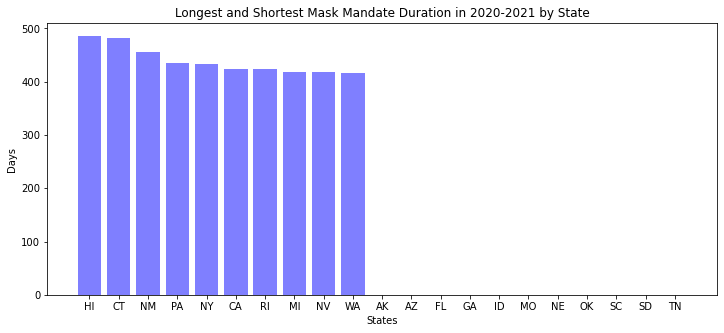

In [14]:
#Setting the bar plot
plt.subplots(figsize=(12,5))
plt.bar(Mask_Mandate_State, Mask_Mandate_Duration, color='b', alpha=0.5, align="center")
plt.title("Longest and Shortest Mask Mandate Duration in 2020-2021 by State")
plt.xlabel("States")
plt.ylabel("Days")
plt.savefig("Images/Mask_Barchart.png")